In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)
Base.prepare

<bound method AutomapBase.prepare of <class 'sqlalchemy.ext.automap.Base'>>

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
precipitation =(session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= '2016-08-23').all())
precipitation



# Use Pandas Plotting with Matplotlib to plot the data




[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [27]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_data = pd.DataFrame(precipitation)
precipitation_data.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [28]:
# Sort the dataframe by date
precipitation_data.sort_values(by = 'date')
precipitation_data.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = precipitation_data.describe()
summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<AxesSubplot:xlabel='date'>

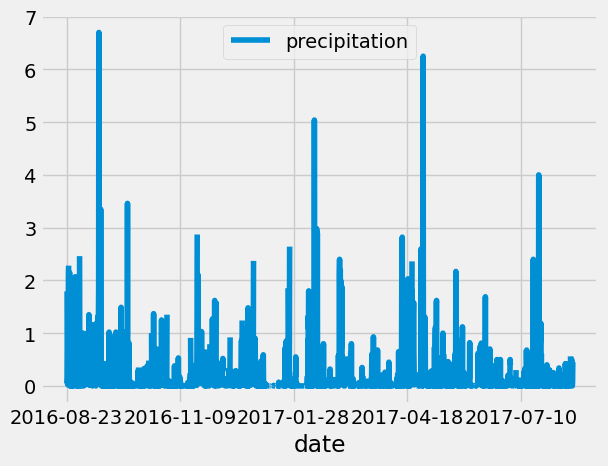

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.plot()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.station).group_by(Station.station).count()
stations

9

In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
m_stations = session.query(Measurement.station).all()
sta = []
for x in range(len(m_stations)):
    sta.append(m_stations[x][0])
active_stations = pd.Series(sta).value_counts()
df = pd.DataFrame(active_stations,columns=['Frequency'])
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index':'Station'},inplace=True)
most_active_station = df.loc[df['Frequency']==df['Frequency'].max()]['Station'][0]
print(df)
print("")
print(f"Most active station: {most_active_station}")

       Station  Frequency
0  USC00519281       2772
1  USC00519397       2724
2  USC00513117       2709
3  USC00519523       2669
4  USC00516128       2612
5  USC00514830       2202
6  USC00511918       1979
7  USC00517948       1372
8  USC00518838        511

Most active station: USC00519281


In [18]:
# List the stations and the counts in descending order
station_names = session.query(Measurement.station,func.count(Measurement.station).\
              label('count')).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
station_names

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.max(Measurement.tobs),func.avg(Measurement.tobs),func.min(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').all()



[(85.0, 71.66378066378067, 54.0)]

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures =(session.query(Measurement.date,Measurement.tobs).\
               filter(Measurement.station == 'USC00519281').\
               filter(Measurement.date >= '2016-08-23').all())
temperature_data = pd.DataFrame(temperatures)
temperature_data.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


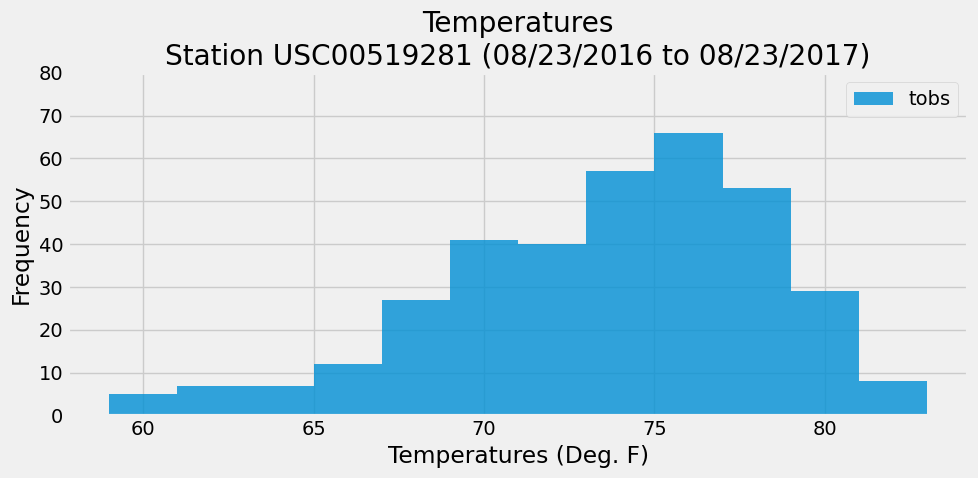

In [21]:
# Use Pandas Plotting with Matplotlib to plot a histogram
fig2= temperature_data.plot(x = 'date', y = 'tobs',kind = 'hist',
                            bins = 12,figsize = (10,5),alpha = 0.8)
#Set labels etc.
fig2.set_title("Temperatures\nStation USC00519281 (08/23/2016 to 08/23/2017)")
fig2.set_ylabel("Frequency")
fig2.set_xlabel("Temperatures (Deg. F)")
#Set y ticks with start= 0, end = 90, stepsize = 10
fig2.set_yticks(np.arange(0,90,10))

plt.tight_layout()
#Save figure as a .png
fig = fig2.get_figure()
fig.savefig("temperature.png")

# Close session

In [22]:
# Close Session
session.close()